In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as stats
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/2018_Financial_Data.csv")
len(df)

4392

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4392 entries, 0 to 4391
Columns: 225 entries, Unnamed: 0 to Class
dtypes: float64(222), int64(1), object(2)
memory usage: 7.5+ MB


In [ ]:
df.describe()

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,2019 PRICE VAR [%],Class
count,4.346000e+03,4253.000000,4.207000e+03,4.328000e+03,4.155000e+03,4.226000e+03,4.208000e+03,4.357000e+03,4.208000e+03,4.321000e+03,...,4067.000000,4268.000000,4160.000000,4178.000000,4121.000000,4128.000000,4133.000000,4144.000000,4392.000000,4392.000000
mean,5.119287e+09,3.455278,3.144946e+09,2.043954e+09,1.180176e+08,9.005022e+08,1.435546e+09,6.541207e+08,1.001350e+08,5.584432e+08,...,0.006081,36.768524,0.183066,1.389013,0.262530,9.928446,0.091891,0.153610,20.803948,0.693534
std,2.049504e+10,195.504906,1.508813e+10,7.682369e+09,9.330891e+08,3.661116e+09,5.529831e+09,2.969341e+09,3.780021e+08,2.639327e+09,...,0.239653,2347.079237,4.688013,35.123904,5.612666,363.717734,0.823281,0.839647,82.622147,0.461078
min,-6.894100e+07,-3.461500,-2.669055e+09,-1.818220e+09,-1.042000e+08,-1.401594e+08,-4.280000e+09,-1.455700e+10,-1.408252e+09,-2.177200e+10,...,-1.000000,-1.000000,-1.000000,-0.999100,-32.258100,-1.000000,-1.000000,-1.000000,-99.864779,0.000000
25%,6.501425e+07,0.000000,3.415500e+06,3.618903e+07,0.000000e+00,2.056226e+07,4.223644e+07,-5.510000e+06,0.000000e+00,-1.000800e+07,...,0.000000,-0.048075,0.000000,-0.036700,-0.108600,-0.082850,0.000000,-0.004650,-7.477173,0.000000
50%,4.982640e+08,0.074900,1.741180e+08,2.219470e+08,0.000000e+00,9.390450e+07,1.806253e+08,4.203800e+07,5.693500e+06,2.730700e+07,...,0.000000,0.010200,0.000000,0.034750,0.026100,0.000000,0.000000,0.065700,17.639393,1.000000
75%,2.457878e+09,0.188500,1.297814e+09,9.767015e+08,1.450150e+07,4.117162e+08,6.796040e+08,2.862690e+08,5.817075e+07,2.238810e+08,...,0.042050,0.185900,0.080050,0.160575,0.138400,0.115425,0.009700,0.167625,39.625879,1.000000
max,5.003430e+11,12739.000000,3.733960e+11,1.269470e+11,2.883700e+10,1.065100e+11,1.065100e+11,7.089800e+10,9.168000e+09,7.290300e+10,...,4.079100,153332.333300,293.473000,1184.993800,313.395800,17646.823500,36.898100,43.718800,3756.716345,1.000000


In [ ]:
df["Sector"].unique()

array(['Consumer Cyclical', 'Energy', 'Technology', 'Industrials',
       'Financial Services', 'Basic Materials', 'Communication Services',
       'Consumer Defensive', 'Healthcare', 'Real Estate', 'Utilities'],
      dtype=object)

In [ ]:
df_copy=df.copy()

Converting categorical column to categorical column

In [ ]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df_copy['Sector']= label_encoder.fit_transform(df_copy['Sector'])

df_copy['Sector'].unique()


array([ 2,  4,  9,  7,  5,  0,  1,  3,  6,  8, 10])

In [ ]:
df_copy.head(3)

,Unnamed: 0,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,2019 PRICE VAR [%],Class
0,CMCSA,9.450700e+10,0.1115,0.000000e+00,9.450700e+10,0.000000e+00,6.482200e+10,7.549800e+10,1.900900e+10,3.542000e+09,...,0.2570,0.0000,0.3426,0.0722,0.7309,0.000,0.1308,2,32.794573,1
1,KMI,1.414400e+10,0.0320,7.288000e+09,6.856000e+09,0.000000e+00,6.010000e+08,3.062000e+09,3.794000e+09,1.917000e+09,...,0.0345,-0.0920,-0.0024,0.0076,-0.0137,0.000,-0.1265,4,40.588068,1
2,INTC,7.084800e+10,0.1289,2.711100e+10,4.373700e+10,1.354300e+10,6.750000e+09,2.042100e+10,2.331600e+10,-1.260000e+08,...,0.1989,0.0387,0.0382,0.1014,-0.0169,0.039,-0.0942,9,30.295514,1


In [ ]:
from sklearn.preprocessing import StandardScaler
# scaled_features2=clean_dataset(df_copy)
scaled_features = StandardScaler().fit_transform(df_copy.iloc[:,1:].values)
# scaled_features2


In [ ]:
columns=["Total debt","Operating Income","EBITDA Margin","daysOfPayablesOutstanding","Inventory Turnover","Revenue Growth","Free Cash Flow","returnOnCapitalEmployed","returnOnEquity","Book Value per Share","Class"]
len(columns)

11

**We have 10 features and 1 target feature**

In [ ]:
df_final=df_copy[columns]

In [ ]:
df_final.describe()

,Total debt,Operating Income,EBITDA Margin,daysOfPayablesOutstanding,Inventory Turnover,Revenue Growth,Free Cash Flow,returnOnCapitalEmployed,returnOnEquity,Book Value per Share,Class
count,4.224000e+03,4.357000e+03,4084.000000,4158.000000,4153.000000,4253.000000,4.225000e+03,3290.000000,4.136000e+03,4140.000000,4392.000000
mean,4.276841e+09,6.541207e+08,-7.943095,264.293788,48.044948,3.455278,5.063973e+08,-0.484180,2.685090e+03,-70.206259,0.693534
std,2.309952e+10,2.969341e+09,182.556970,3728.406346,1494.046198,195.504906,3.049297e+09,5.646011,1.732375e+05,5648.293390,0.461078
min,-8.451650e+09,-1.455700e+10,-8809.838000,-26028.289100,0.000000,-3.461500,-6.227011e+10,-151.944400,-3.477246e+04,-363376.472000,0.000000
25%,9.184428e+06,-5.510000e+06,0.015950,10.118775,0.000000,0.000000,-1.085712e+07,-0.021675,-8.107500e-02,3.217750,0.000000
50%,2.601950e+08,4.203800e+07,0.129700,27.282600,3.237400,0.074900,2.472500e+07,0.035700,7.485000e-02,9.939000,1.000000
75%,1.710580e+09,2.862690e+08,0.310000,56.558975,10.604000,0.188500,2.098000e+08,0.090675,1.532250e-01,20.550250,1.000000
max,5.336270e+11,7.089800e+10,3090.870000,127441.758100,95827.710300,12739.000000,9.414620e+10,167.328600,1.114114e+07,3397.105000,1.000000


In [ ]:
df_final.isna().sum()

Total debt                    168
Operating Income               35
EBITDA Margin                 308
daysOfPayablesOutstanding     234
Inventory Turnover            239
Revenue Growth                139
Free Cash Flow                167
returnOnCapitalEmployed      1102
returnOnEquity                256
Book Value per Share          252
Class                           0
dtype: int64

In [ ]:
for i in df_final.columns:
    df_final[i].fillna(df_final[i].mean(),inplace=True)
    

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


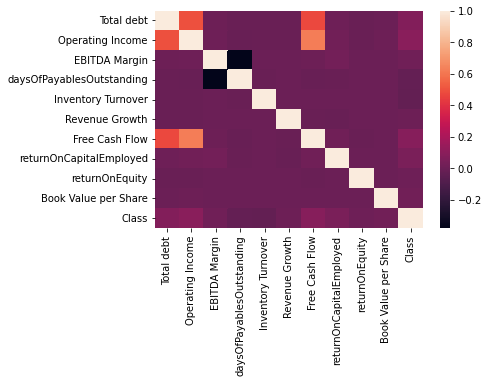

In [ ]:
sns.heatmap(df_final.corr())

Removing Feature returnOnEquity and Book Value per Share as the correlation towards target function is as significant as returnoncapital employed

In [ ]:
df_final.drop(columns=["returnOnEquity","Book Value per Share"],inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


**Categorizing the data in specific value**

* In order to be able to properly use our data , we need to convert some discrete features to categorical features so that we can have fixed number of categories for that column which would be easier for classification .
* So we define a preprocessor function to be applied on different columns .

In [ ]:
df_final.describe()

,Total debt,Operating Income,EBITDA Margin,daysOfPayablesOutstanding,Inventory Turnover,Revenue Growth,Free Cash Flow,returnOnCapitalEmployed,Class
count,4.392000e+03,4.392000e+03,4392.000000,4392.000000,4392.000000,4392.000000,4.392000e+03,4392.000000,4392.000000
mean,4.276841e+09,6.541207e+08,-7.943095,264.293788,48.044948,3.455278,5.063973e+08,-0.484180,0.693534
std,2.265331e+10,2.957483e+09,176.037986,3627.701396,1452.817226,192.385604,2.990749e+09,4.886433,0.461078
min,-8.451650e+09,-1.455700e+10,-8809.838000,-26028.289100,0.000000,-3.461500,-6.227011e+10,-151.944400,0.000000
25%,1.086581e+07,-5.199308e+06,-0.024475,11.169625,0.000000,0.000000,-9.571750e+06,-0.484180,0.000000
50%,3.019144e+08,4.366150e+07,0.113000,29.251050,4.218050,0.078800,3.033400e+07,0.000000,1.000000
75%,2.139258e+09,3.019341e+08,0.290000,64.901950,13.153500,0.211475,2.659730e+08,0.067125,1.000000
max,5.336270e+11,7.089800e+10,3090.870000,127441.758100,95827.710300,12739.000000,9.414620e+10,167.328600,1.000000


In [ ]:
def Cat_in2(df,atr):
  m = 0
  for i in atr:
    m = df[i].mean()
    df[i] = [1 if x>m else 0 for x in df[i]]
  return df
  
    # print()

In [ ]:
def Cat_in3(df,atr):
  for i in atr:
    a=df.describe()[i]["50%"]
    b=df.describe()[i]["75%"]
    for x in range(len(df[i])):
      if df[i][x]<a:
        df[i][x]=0
      if df[i][x]>a:
        if df[i][x]<b:
          df[i][x]=1
      if df[i][x]>b:
        df[i][x]=2
        
    # df[i] = [0 if x<a else 1 if a<=x<b else 2 for x in df[i]]
  return df

In [ ]:
df_final_copy=df_final.copy()

In [ ]:
df_final_copy.columns

Index(['Total debt', 'Operating Income', 'EBITDA Margin',
       'daysOfPayablesOutstanding', 'Inventory Turnover', 'Revenue Growth',
       'Free Cash Flow', 'returnOnCapitalEmployed', 'Class'],
      dtype='object')

**Dividing Features into 2 and 3 discrete value ,
if there numerical  range of  features is more , dividing into 3 discrete values rest 2**


In [ ]:
col_cat2=["EBITDA Margin","daysOfPayablesOutstanding","Inventory Turnover","Revenue Growth","returnOnCapitalEmployed"]
col_cat3=["Total debt","Operating Income","Free Cash Flow"]

In [ ]:
# for i in col_cat2:
    # print(i)
df_final_copy=Cat_in2(df_final_copy,col_cat2)
df_final_copy=Cat_in3(df_final_copy,col_cat3)

<ipython-input-20-c8c54c9dc13d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][x]=2
<ipython-input-20-c8c54c9dc13d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][x]=1
<ipython-input-20-c8c54c9dc13d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][x]=0


In [ ]:
df_final_copy["Operating Income"].unique()

array([2., 0., 1.])

In [ ]:
df_final_copy["Total debt"].unique()

array([2., 1., 0.])

In [ ]:
df_final_copy["returnOnCapitalEmployed"].unique()


array([1, 0])

In [ ]:
df_final_copy["returnOnCapitalEmployed"].unique()


array([1, 0])

Finding Probabilities of Independence feature

In [ ]:
d = {}

def get_prob(atr):
    l = len(df_final_copy)
    uniq = sorted(df_final_copy[atr].unique())
    p = [round(len(df_final_copy[df_final_copy[atr] == x])/l, 4) for x in uniq]
    d[atr] = p
cols = df_final_copy.columns
for i in cols:
  get_prob(i)
print(d)


{'Total debt': [0.5, 0.25, 0.25], 'Operating Income': [0.5, 0.25, 0.25], 'EBITDA Margin': [0.1084, 0.8916], 'daysOfPayablesOutstanding': [0.9517, 0.0483], 'Inventory Turnover': [0.9192, 0.0808], 'Revenue Growth': [0.9556, 0.0444], 'Free Cash Flow': [0.5, 0.25, 0.25], 'returnOnCapitalEmployed': [0.0772, 0.9228], 'Class': [0.3065, 0.6935]}


In [ ]:
def dep1_prob(atr, dep):
  l = len(df_final_copy)
  u1 = sorted(df_final_copy[atr].unique())
  u2 = sorted(df_final_copy[dep].unique())
  p = []
  for i in u1:
    a = []
    for j in u2:
      a.append(round(len(df_final_copy[(df_final_copy[atr] == i) & (df_final_copy[dep] == j)])/len(df_final_copy[df_final_copy[dep] == j]), 4))
    p.append(a)
  return p

# dep1_prob("Total debt", "Operating Income")
dep1_prob("Operating Income","Total debt")

[[0.7855, 0.2559, 0.173], [0.1781, 0.5036, 0.1403], [0.0364, 0.2404, 0.6867]]

In [ ]:
# dep1_prob("Operating Income","EBITDA Margin")
dep1_prob("EBITDA Margin","Operating Income")

[[0.189, 0.0182, 0.0373], [0.811, 0.9818, 0.9627]]

In [ ]:
def node2_prob(atr, dep1, dep2):
  u1 = sorted(df_final_copy[atr].unique())
  u2 = sorted(df_final_copy[dep1].unique())
  u3 = sorted(df_final_copy[dep2].unique())
  p = []
  for i in u1:
    a = []
    for j in u2:
      for k in u3:
        a.append(round(len(df_final_copy[(df_final_copy[atr] == i) & (df_final_copy[dep1] == j) & (df_final_copy[dep2] == k)])/len(df_final_copy[(df_final_copy[dep1] == j) & (df_final_copy[dep2] == k)]), 4))
    p.append(a)
  return p

# node2_prob('daysOfPayablesOutstanding', 'Inventory Turnover', 'Revenue Growth')
node2_prob( 'Revenue Growth','daysOfPayablesOutstanding', 'Inventory Turnover')

[[0.9546, 0.9799, 0.9317, 1.0], [0.0454, 0.0201, 0.0683, 0.0]]

**Probablistic Graphical Model Relationships**

* In order to create a Probablistic Graphical Model representing this dataset , we first need to find the relationships in the dataset and the flow of influence that is essential in perspective of the PGM.

In [ ]:
!pip install networkx
!pip install pgmpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 26.6 MB/s 


In [ ]:
prob_OI = dep1_prob("Operating Income","Total debt")
l = []
for i in prob_OI:
  l.append([i[0]])
l

[[0.7855], [0.1781], [0.0364]]

In [ ]:
dep1_prob("Operating Income","Total debt")

[[0.7855, 0.2559, 0.173], [0.1781, 0.5036, 0.1403], [0.0364, 0.2404, 0.6867]]

In [ ]:
prob_OI = dep1_prob("EBITDA Margin","Operating Income")
l2 = []
for i in prob_OI:
  l.append([i[0]])
l2

[]

In [ ]:
d

{'Total debt': [0.5, 0.25, 0.25],
 'Operating Income': [0.5, 0.25, 0.25],
 'EBITDA Margin': [0.1084, 0.8916],
 'daysOfPayablesOutstanding': [0.9517, 0.0483],
 'Inventory Turnover': [0.9192, 0.0808],
 'Revenue Growth': [0.9556, 0.0444],
 'Free Cash Flow': [0.5, 0.25, 0.25],
 'returnOnCapitalEmployed': [0.0772, 0.9228],
 'Class': [0.3065, 0.6935]}

In [ ]:
d['Free Cash Flow'][1]

0.25

In [ ]:
node2_prob('Revenue Growth','daysOfPayablesOutstanding', 'Inventory Turnover')

[[0.9546, 0.9799, 0.9317, 1.0], [0.0454, 0.0201, 0.0683, 0.0]]

In [ ]:
from decimal import DivisionByZero
def dep4_prob(atr, dep1, dep2, dep3, dep4):
  u1 = sorted(df_final_copy[atr].unique())
  u2 = sorted(df_final_copy[dep1].unique())
  u3 = sorted(df_final_copy[dep2].unique())
  u4 = sorted(df_final_copy[dep3].unique())
  u5 = sorted(df_final_copy[dep4].unique())
  p = []
  for i in u1:
    a = []
    for j in u2:
      for k in u3:
        for l in u4:
          for m in u5:
            dn=len(df_final_copy[(df_final_copy[dep1] == j) & (df_final_copy[dep2] == k) & (df_final_copy[dep3] == l) & (df_final_copy[dep4] == m)])
            if (dn):
              a.append(round(len(df_final_copy[(df_final_copy[atr] == i) & (df_final_copy[dep1] == j) & (df_final_copy[dep2] == k) & (df_final_copy[dep3] == l) & (df_final_copy[dep4] == m)])/len(df_final_copy[(df_final_copy[dep1] == j) & (df_final_copy[dep2] == k) & (df_final_copy[dep3] == l) & (df_final_copy[dep4] == m)]), 4))
            else:
              a.append(0)
    p.append(a)
  return p

In [ ]:
# len(dep4_prob("Class","returnOnCapitalEmployed","Free Cash Flow","EBITDA Margin","Revenue Growth")[0])
res=dep4_prob("Class","returnOnCapitalEmployed","Free Cash Flow","EBITDA Margin","Revenue Growth")


In [ ]:
for i in range(24):
  if((res[0][i]+res[1][i])==1):
    pass
  else:
    res[1][i]=1-res[0][i]

In [ ]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD

InvestmentReturn_model = BayesianNetwork([('daysOfPayablesOutstanding', 'Revenue Growth'), ('Inventory Turnover', 'Revenue Growth'), ('returnOnCapitalEmployed', 'Class'), ('Free Cash Flow', 'Class'), ('Total debt', 'Operating Income'), ('Operating Income', 'EBITDA Margin'), ('EBITDA Margin', 'Class'), ('Revenue Growth', 'Class')])
cpd_roce = TabularCPD('returnOnCapitalEmployed', 2, [[d['returnOnCapitalEmployed'][0]], [d['returnOnCapitalEmployed'][1]]])
cpd_free_cashflow = TabularCPD('Free Cash Flow', 3, [[d['Free Cash Flow'][0]], [d['Free Cash Flow'][1]],[d['Free Cash Flow'][2]]])
cpd_total_debt = TabularCPD('Total debt', 3, [[d['Total debt'][0]], [d['Total debt'][1]], [d['Total debt'][2]]])
cpd_operating_income = TabularCPD('Operating Income', 3,dep1_prob("Operating Income","Total debt"),["Total debt"],[3])
cpd_ebitda = TabularCPD('EBITDA Margin', 2, dep1_prob("EBITDA Margin","Operating Income"),["Operating Income"],[3])
cpd_daysofPayable = TabularCPD('daysOfPayablesOutstanding', 2, [[d['daysOfPayablesOutstanding'][0]], [d['daysOfPayablesOutstanding'][1]]])
cpd_inventory = TabularCPD('Inventory Turnover', 2, [[d['Inventory Turnover'][0]], [d['Inventory Turnover'][1]]])
# cpd_inventory=TabularCPD('Total debt', 3, [[d['Total debt'][0]], [d['Total debt'][1]], [d['Total debt'][2]]])
cpd_revenue_growth = TabularCPD('Revenue Growth', 2, node2_prob('Revenue Growth','daysOfPayablesOutstanding', 'Inventory Turnover'),["daysOfPayablesOutstanding","Inventory Turnover"],[2,2])
# cpd_class = TabularCPD('Class', 2, dep4_prob("Class","returnOnCapitalEmployed","Free Cash Flow","EBITDA Margin","Revenue Growth"),["returnOnCapitalEmployed","Free Cash Flow","EBITDA Margin","Revenue Growth"],[2,3,2,2])
cpd_class = TabularCPD('Class', 2, res,["returnOnCapitalEmployed","Free Cash Flow","EBITDA Margin","Revenue Growth"],[2,3,2,2])

# cpd_Diabetes = TabularCPD('Diabetes', 2, dep_prob('Outcome', 'Glucose'), ['Glucose'], [3])
# cpd_Insulin = TabularCPD('Insulin', 2, dep_prob2('Insulin', 'Age', 'DiabetesPedigreeFunction'), ['Age', 'PedFunc'], [3, 2])
# cpd_BloodP = TabularCPD('BloodP', 2, dep_prob4('BloodPressure', 'BMI', 'Insulin', 'Glucose', 'Outcome'), ['BMI', 'Insulin', 'Glucose', 'Diabetes'], [2, 2, 3, 2])


In [ ]:
InvestmentReturn_model.add_cpds(cpd_total_debt,cpd_operating_income,cpd_ebitda,cpd_revenue_growth,cpd_free_cashflow,cpd_roce,cpd_daysofPayable,cpd_inventory,cpd_class)

In [ ]:
InvestmentReturn_model.check_model()

True

In [ ]:
print(cpd_class)

+-------------------------+-----+----------------------------+
| returnOnCapitalEmployed | ... | returnOnCapitalEmployed(1) |
+-------------------------+-----+----------------------------+
| Free Cash Flow          | ... | Free Cash Flow(2)          |
+-------------------------+-----+----------------------------+
| EBITDA Margin           | ... | EBITDA Margin(1)           |
+-------------------------+-----+----------------------------+
| Revenue Growth          | ... | Revenue Growth(1)          |
+-------------------------+-----+----------------------------+
| Class(0)                | ... | 0.2                        |
+-------------------------+-----+----------------------------+
| Class(1)                | ... | 0.8                        |
+-------------------------+-----+----------------------------+


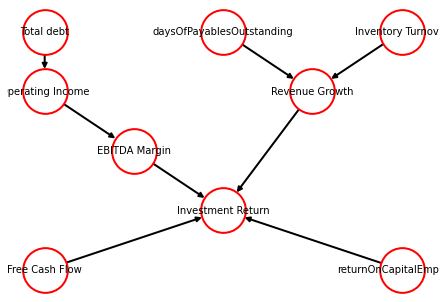

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
edges = [('Total debt', 'Operating Income'), ('Operating Income', 'EBITDA Margin'), ('EBITDA Margin', 'Investment Return'), ('daysOfPayablesOutstanding', 'Revenue Growth'),('Revenue Growth','Investment Return'), ('Inventory Turnover', 'Revenue Growth'), ('Free Cash Flow', 'Investment Return'), ('returnOnCapitalEmployed', 'Investment Return')]
g = nx.DiGraph()

for i in edges:
  g.add_edge(i[0], i[1])

pos = {'Total debt': (-3,3), 'Operating Income':(-3,2), 'EBITDA Margin':(-1.5,1), 'Investment Return':(0,0), 'Revenue Growth':(1.5,2), 'daysOfPayablesOutstanding':(0,3), 'Inventory Turnover':(3,3), 'Free Cash Flow':(-3,-1), 'returnOnCapitalEmployed':(3,-1)}

options = {
    "font_size": 10,
    "node_size": 2000,
    "node_color": "white",
    "edgecolors": "red",
    "linewidths": 2,
    "width": 2,
}

nx.draw(g, **options, with_labels = True, pos=pos)

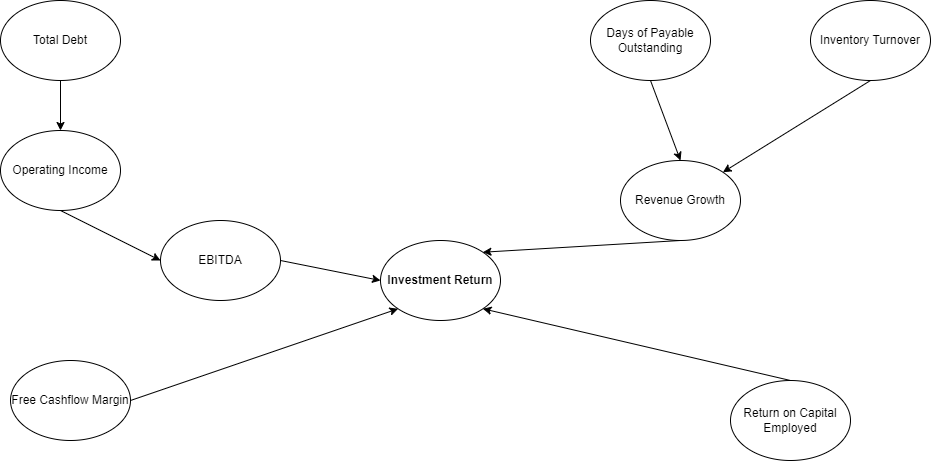

**INFERENCE**

In [ ]:
from pgmpy.inference import VariableElimination
infer = VariableElimination(InvestmentReturn_model)
g_dist = infer.query(['Revenue Growth'])
print(g_dist)

+-------------------+-----------------------+
| Revenue Growth    |   phi(Revenue Growth) |
+===================+=======================+
| Revenue Growth(0) |                0.9557 |
+-------------------+-----------------------+
| Revenue Growth(1) |                0.0443 |
+-------------------+-----------------------+


In [ ]:
print(infer.query(['Class']))


+----------+--------------+
| Class    |   phi(Class) |
+==========+==============+
| Class(0) |       0.2896 |
+----------+--------------+
| Class(1) |       0.7104 |
+----------+--------------+


##Causal Reasoning

In [ ]:
print(infer.query(['Revenue Growth'], evidence={'Inventory Turnover': 0}))


+-------------------+-----------------------+
| Revenue Growth    |   phi(Revenue Growth) |
+===================+=======================+
| Revenue Growth(0) |                0.9535 |
+-------------------+-----------------------+
| Revenue Growth(1) |                0.0465 |
+-------------------+-----------------------+


In [ ]:
print(infer.query(['Class'], evidence={'Revenue Growth': 0}))

+----------+--------------+
| Class    |   phi(Class) |
+==========+==============+
| Class(0) |       0.2899 |
+----------+--------------+
| Class(1) |       0.7101 |
+----------+--------------+


##Intercausal Reasoning

In [ ]:
print(infer.query(['Class'], evidence={'Revenue Growth': 0,"returnOnCapitalEmployed":0,"Free Cash Flow":0,"EBITDA Margin":0}))
# infer.query(['Class'], evidence={'Revenue Growth': 0,"returnOnCapitalEmployed":0,"Free Cash Flow":0,"EBITDA Margin":0})


+----------+--------------+
| Class    |   phi(Class) |
+==========+==============+
| Class(0) |       0.5327 |
+----------+--------------+
| Class(1) |       0.4673 |
+----------+--------------+


In [ ]:
import numpy as np
import pandas as pd
from pgmpy.models import BayesianNetwork

train_data = df_final_copy[:80]
predict_data = df_final_copy[80:]
InvestmentReturn_model.fit(df_final_copy)
predict_data = predict_data.copy()
predict_data.drop('Class', axis=1, inplace=True)
y_prob = InvestmentReturn_model.predict_probability(predict_data)

In [ ]:
Class_pred=[1 if y_prob['Class_0'][i]<0.5 else 0 for i in range(80,4313)]

In [ ]:
def acc(Class_pred,Trueclass):
  n=len(Trueclass)
  tp=0
  tn=0
  fp=0
  fn=0
  for i in range(len(Trueclass)):
    if Class_pred[i]==Trueclass[i]:
      if Class_pred[i] == 1:
        tp+=1
      else:
        tn+=1
    else:
      if(Trueclass[i] == 0):
        fp+=1
      else:
        fn+=1

  precision = (tp/(tp+fp))
  recall = (tp/(tp+fn))
  print(f"The accuracy is {((tp+tn)/n)*100}%")
  print(f"The precision is {precision}")
  print(f"The recall is {recall}")
  print(f"The f1-score is {2*(precision*recall)/(precision+recall)}")


In [ ]:
dfn=df_final_copy[80:4313]
dfn.reset_index(inplace=True)
dfn["Class"][0]
# dfn.reset_index(inplace=True)
len(Class_pred)
# dfn.drop(columns="ïndex",inplace=True)
len(dfn)


4233

In [ ]:
acc(Class_pred,dfn["Class"])

The accuracy is 71.15520907158044%
The precision is 0.7290719443701524
The recall is 0.929107021131561
The f1-score is 0.8170238273640043


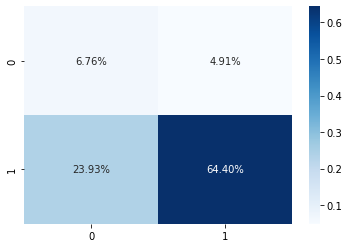

In [ ]:
cf_matrix = confusion_matrix(Class_pred,dfn["Class"])
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

#Naive bayes

In [ ]:
from pgmpy.models import NaiveBayes

In [ ]:
model = NaiveBayes()
model.fit(df_final_copy,'Class')
model.get_cpds()

[<TabularCPD representing P(Class:2) at 0x7f26e2c17910>,
 <TabularCPD representing P(Total debt:3 | Class:2) at 0x7f26e0ba59a0>,
 <TabularCPD representing P(Operating Income:3 | Class:2) at 0x7f26e2c17c70>,
 <TabularCPD representing P(EBITDA Margin:2 | Class:2) at 0x7f26e0ba5970>,
 <TabularCPD representing P(daysOfPayablesOutstanding:2 | Class:2) at 0x7f26e0ba5940>,
 <TabularCPD representing P(Inventory Turnover:2 | Class:2) at 0x7f26e0ba3940>,
 <TabularCPD representing P(Revenue Growth:2 | Class:2) at 0x7f26e2c5d220>,
 <TabularCPD representing P(Free Cash Flow:3 | Class:2) at 0x7f26e0ba3100>,
 <TabularCPD representing P(returnOnCapitalEmployed:2 | Class:2) at 0x7f26e0ba3220>]

In [ ]:
for i in model.get_cpds():
  print(i)

+----------+----------+
| Class(0) | 0.306466 |
+----------+----------+
| Class(1) | 0.693534 |
+----------+----------+
+-----------------+---------------------+---------------------+
| Class           | Class(0)            | Class(1)            |
+-----------------+---------------------+---------------------+
| Total debt(0.0) | 0.6820208023774146  | 0.4195666447800394  |
+-----------------+---------------------+---------------------+
| Total debt(1.0) | 0.1849925705794948  | 0.27872619829284306 |
+-----------------+---------------------+---------------------+
| Total debt(2.0) | 0.13298662704309064 | 0.3017071569271175  |
+-----------------+---------------------+---------------------+
+-----------------------+--------------------+---------------------+
| Class                 | Class(0)           | Class(1)            |
+-----------------------+--------------------+---------------------+
| Operating Income(0.0) | 0.6835066864784547 | 0.4189100459619173  |
+-----------------------+---

In [ ]:
X = df_final_copy.drop(columns=['Class'])
y = df_final_copy.Class

# training the model on training set
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# making predictions on the testing set
y_pred = gnb.predict(X_test)


In [ ]:
gnbpred=gnb.predict(predict_data)

accuracy_score(dfn["Class"], gnbpred[79:])*100
y_test.reset_index(level=None, drop=True, inplace=False)

0       1
1       1
2       1
3       0
4       1
       ..
1752    0
1753    0
1754    1
1755    0
1756    1
Name: Class, Length: 1757, dtype: int64

**Accuracy**

In [ ]:
test_y_pass = y_test.reset_index(level=None, drop=True, inplace=False)
acc(gnbpred[79:], dfn["Class"])

The accuracy is 63.02858492794709%
The precision is 0.6986937590711175
The recall is 0.8203817314246762
The f1-score is 0.7546637403981815


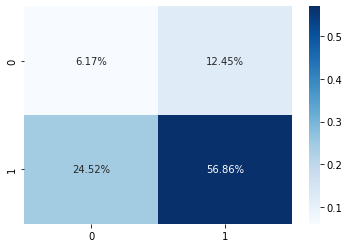

In [ ]:
cf_matrix = confusion_matrix(gnbpred[79:], dfn["Class"])
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')